# Le problème de Josèphe

## analyse de la formalisation d'un problème

### comparaison approfondie de plusieurs approches

_Le présent T.D. fait apparaître l'importance d'une formalisation correcte des problèmes ; un énoncé simple donne lieu à plusieurs stratégies également intuitives mais de complexités très variées._

Le problème retenu est le [problème de Josèphe](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_Jos%C3%A8phe), analysé en détail par Ronald Graham, Donald Knuth et Oren Patashnik dans l'ouvrage classique [Concrete Mathematics](https://fr.wikipedia.org/wiki/Concrete_Mathematics). Des soldats juifs, cernés par des soldats romains, décident de former un cercle et de se donner la mort (plutôt que d'être capturés par leurs ennemis) ; un soldat sur deux est tué tandis que le cercle se resserre de plus en plus ; la question est de déterminer quel soldat sera le survivant.

On numérote les soldats de 1 à $n$ ; on imagine que le soldat n° 1 tient une arme avec laquelle il tue son compagnon le soldat n° 2, puis il tend l'arme au suivant, donc le soldat n° 3, lequel tue à son tour son voisin, le soldat n° 4, etc. Bien entendu, la disposition étant circulaire, il est tout à fait possible que le soldat n° 1 soit à son tour tué une fois que l'arme aura fait un tour du cercle. L'image ci-dessous illustre le processus pour $n=13$ (après le neuvième meurtre, l'arme étant alors entre les mains du soldat n° 11).

![image](http://baruchel.metapath.org/classes/prepas/informatique/td_josephus/josephus.jpg)

On cherche à calculer le numéro du soldat survivant pour une valeur donnée de $n$. Dans la figure ci-dessus, on voit que le soldat n° 11 élimine le soldat n° 13 et tend l'arme au soldat n° 3, lequel élimine le soldat n° 7 et tend à nouveau l'arme au soldat n° 11, lequel élimine enfin le soldat n° 3 et reste seul survivant. On a donc $J(13)=11$ (les premières valeurs de cette fonction peuvent être consultées à l'adresse [https://oeis.org/A006257](https://oeis.org/A006257)).

## Mise en forme du problème

Il existe des relations mathématiques permettant de calculer la valeur de $J$ (la fonction qui à $n$ associe le numéro du soldat survivant), mais on souhaite ici simuler l'intégralité du processus. En d'autres termes, on souhaite calculer $J(n)$ par la _force brute_.

Il faut alors stocker la liste des soldats et tenir à jour cette liste au fur et à mesure que le processus se déroule.

Deux premières approches se présentent à l'esprit :

  * stocker les indices des soldats dans une liste et supprimer progressivement les indices des soldats éliminés (la liste diminuera donc progressivement de taille) ;
  * stocker l'état de chaque soldat (vivant ou mort) dans une liste de taille constante en remplaçant progressivement les valeurs.
  
Si l'on reprend la figure ci-dessus, la première approche pourra par exemple représenter l'état actuel du système par la liste `[3, 7, 11, 13]`, tandis que la seconde approche pourra représenter le même état par la liste `[False, False, True, False, False, False, True, False, False, False, True, False, True]`.

Dans les deux cas, une variable supplémentaire devra indiquer où se situe l'arme à un moment donné.

### Utilisation d'une liste d'indices

Écrire en Python une fonction `josephus1` prenant en argument une variable `n` et retournant le numéro du soldat survivant. On représentera le cercle des soldats à l'aide d'une liste d'entiers et l'on supprimera progressivement les valeurs concernées à l'aide de la méthode `pop`.

In [6]:
def josephus1(n):
    L, c = list(range(1, n+1)), 0
    for _ in range(n-1):
        c = (c+1)%len(L)
        L.pop(c)
    return L[0]

### Utilisation d'une liste de booléens

Écrire en Python une fonction `josephus2` prenant en argument une variable `n` et retournant le numéro du soldat survivant. On représentera le cercle des soldats à l'aide d'une liste de booléens et l'on modifiera les booléens concernés à l'aide de la syntaxe usuelle pour modifier un élément d'une liste.

In [7]:
def josephus2(n):
    L, c, state, count = [True]*n, 0, False, 0
    while count < n:
        c = (c+1)%n
        L[c], state, count = (
            L[c] and state,
            L[c] ^ state,
            count + (L[c] and not state) )
    return c+1

### Comparaison du temps d'exécution de `josephus1` et de `josephus2`

Le code ci-dessous appelle les deux fonctions précédemment définies et trace leur temps d'exécution pour des valeurs croissantes de $n$. La première fonction (en rouge), peut-être plus initialement rapide (pour des petites valeurs de $n$) est rapidement dépassée par la seconde (en bleu).

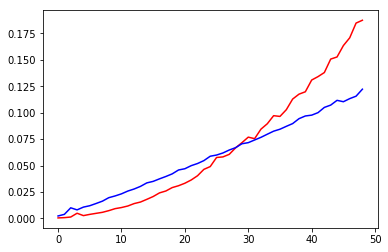

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
from time import time

t1, t2 = [], []
for n in range(1000, 50000, 1000):
    t = time()
    _ = josephus1(n)
    t1.append(time() - t)
    t = time()
    _ = josephus2(n)
    t2.append(time() - t)

plt.plot(t1, color="red")
plt.plot(t2, color="blue")

On doit donc se garder de comparer deux implémentations en fonction de quelques mesures de temps ; bien que plus rapide pour des valeurs jusqu'aux environs de 25000, la première fonction est manifestement moins bonne que la seconde. _C'est l'évolution du temps de calcul qui intéresse la théorie de la complexité et non des valeurs absolues._

### Calcul rigoureux de la complexité de `josephus1` et de `josephus2`.

Calculer la complexité de chacune des deux fonctions `josephus1` et `josephus2`. On donne les pistes suivantes :

  * on admettra que $n$ est une puissance de 2, ce qui simplifiera les calculs ;
  * la méthode `pop` a une complexité linéaire liée au nombre d'éléments situés à droite de celui que l'on supprime (si l'on supprime le dixième élément d'une liste de cent éléments, quatre-vingt-dix éléments devront être décalés vers la gauche) ;
  * pour la fonction `josephus1` on calculera le nombre d'éléments décalés par la méthode `pop` lors du premier tour du cercle, puis lors du second, etc.
  * pour la fonction `josephus2` on remarque que la liste de $n$ éléments est entièrement parcourue à chaque tour même s'il ne reste que quelques survivants ; il suffit alors de déterminer le nombre de tours de cercle parcourus par l'arme.

### Amélioration de la première approche

Il est en réalité plus pertinent de construire à chaque tour de cercle une nouvelle liste d'indices (des survivants) plutôt que de supprimer  un à un les éléments de la liste. Écrire une fonction `josephus3` qui travaille sur une liste d'indices (comme `josephus1`) mais en copiant les indices des soldats survivants dans une nouvelle liste à chaque tour.

In [14]:
def josephus3(n):
    L, o = list(range(1, n+1)), 0
    while len(L) > 1:
        L, o = L[o::2], o^(len(L)%2)
    return L[0]

### Comparaison du temps d'exécution de `josephus1`, de `josephus2` et de `josephus3`

On trace ci-dessous les courbes correspondant au temps de calcul des trois fonctions ; la troisième apparaît cette fois en noir.

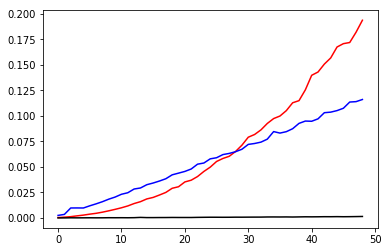

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
from time import time

t1, t2, t3 = [], [], []
for n in range(1000, 50000, 1000):
    t = time()
    _ = josephus1(n)
    t1.append(time() - t)
    t = time()
    _ = josephus2(n)
    t2.append(time() - t)
    t = time()
    _ = josephus3(n)
    t3.append(time() - t)

plt.plot(t1, color="red")
plt.plot(t2, color="blue")
plt.plot(t3, color="black")

### Calcul rigoureux de la complexité de `josephus3`

On admet à nouveau que $n$ est une puissance de 2. On compte les itérations nécessaires à la construction de la première liste, de la seconde, de la troisième, etc.

## Exercices

**1.** Implémenter en $\Theta(n)$ la version historique du problème, dans laquelle un soldat sur trois est éliminé, de façon circulaire et en s’arrêtant quand il ne reste plus que deux survivants. On vérifiera le résultat célèbre, relaté par Josèphe lui-même : pour 41 soldats, les deux survivants sont le 16 et le 31.

**2.** On reprend le principe des exécutions dans le problème de Josèphe exposé au début de ce chapitre, mais on imagine que chaque soldat détient initialement une pièce d’or ; chaque bourreau s’empare de la fortune de sa victime. Calculer par la force brute en $\Theta(n)$ combien rapporte la dernière exécution. On conviendra que cette valeur est 1 pour n =1 et l’on comparera les résultats avec les termes de la suite donnée en [http://oeis.org/A006165](http://oeis.org/A006165).